In [91]:
import pandas as pd
import seaborn as sns
import numpy as np

In [117]:
hmr={}
for cell in ['b','cd3','cd4','cd8','gran','mono','nk','merge']:
    b=pd.read_table('data/hmr/'+cell+'.sub',header=None,usecols=[1,2])
    hmr[cell]=(b[2]-b[1]).sum()/(3.2*10**9)

In [118]:
df=pd.DataFrame.from_dict(hmr,orient='index',columns=['Hypomethylated'])

<Axes: >

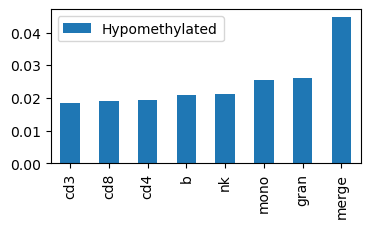

In [119]:
df.sort_values('Hypomethylated').plot(kind='bar',figsize=(4,2))

In [120]:
df.T['merge'].values[0].round(3)

0.045

In [125]:
array450_='https://github.com/zhou-lab/InfiniumAnnotationV1/raw/main/Anno/HM450/HM450.hg38.manifest.tsv.gz'
array450=pd.read_table(array450_,index_col='Probe_ID',usecols=['Probe_ID','CpG_chrm','CpG_beg'])

In [126]:
array450_chr=array450.groupby('CpG_chrm')['CpG_beg'].apply(list)
wb='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41169/matrix/GSE41169_series_matrix.txt.gz'
wb=pd.read_table(wb,skiprows=72,index_col=0)

In [4]:
wb=wb.mean(1)

In [80]:
def f(c,b,e):
    ins=[]
    for c in man[c]:
        if c > b and c<e:
            ins.append(b)
    return len(ins)
def wbm(c,b,e):
    ins=[]
    for i in man[c]:
        if i > b and i<e:
            ins.append(wb.loc[mn[(mn['CpG_chrm']==c)&(mn['CpG_beg']==i)].index].values[0])
    return np.mean(ins)

In [ ]:
b=pd.read_csv('data/hmr/cd4.a',header=None)
b.shape
b['b']=b[[4,5]].min(1)
b['d']=b['b']-b[6]
top=b.sort_values('d',ascending=False).head(1000)
top['man']=top[[0,1,2]].apply(lambda x: f(x[0],x[1],x[2]),axis=1)
top['wb']=top[[0,1,2]].apply(lambda x: wbm(x[0],x[1],x[2],x.name),axis=1)
top[top['man']>7].head(30)

In [88]:
b=pd.read_csv('data/hmr/gran.a',header=None)
b.shape
b['b']=b[[4,5]].min(1)
b['d']=b['b']-b[6]
top=b.sort_values('d',ascending=False).head(500)
top['man']=top[[0,1,2]].apply(lambda x: f(x[0],x[1],x[2]),axis=1)

In [89]:
top['wb']=top[[0,1,2]].apply(lambda x: wbm(x[0],x[1],x[2]),axis=1)

/home/moqri/miniconda3/envs/meth/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/moqri/miniconda3/envs/meth/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [90]:
top[top[3]>30].head(20)

0          1          2    3     4     5     6     b     d  man  \
44164   chr6   30006147   30007691  116  0.63  0.59  0.07  0.59  0.52   47   
44223   chr6   30955159   30956227   39  1.00  0.44  0.05  0.44  0.39   18   
28112  chr19   54361678   54365302   47  0.53  0.48  0.11  0.48  0.37    8   
46395   chr7    2076535    2077217   41  0.63  0.45  0.09  0.45  0.36    3   
20618  chr16   88839895   88841054   42  0.47  0.41  0.05  0.41  0.36    3   
18140  chr16     546615     547423   49  0.46  0.46  0.11  0.46  0.35    1   
16215  chr14  105898631  105901543   68  0.57  0.57  0.22  0.57  0.35    2   
52786   chr9  127828351  127828880   34  0.70  0.63  0.29  0.63  0.34    0   
44144   chr6   29631612   29634032  117  0.60  0.44  0.10  0.44  0.34   23   
18150  chr16     596112     596699   33  0.44  0.39  0.06  0.39  0.33    2   
18519  chr16    4679829    4680656   53  0.45  0.40  0.08  0.40  0.32    5   

             wb  
44164  0.127755  
44223  0.089683  
28112  0.140855  
46395  0.435828  
20618  0.380588  
18140  0.439733  
16215  0.204995  
52786       NaN  
44144  0.156927  
18150  0.491861  
18519  0.389508